In [2]:
from sklearn import tree

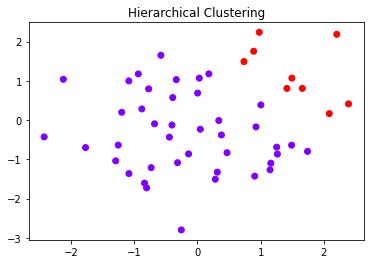

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

# generate some random data
np.random.seed(123)
X = np.random.randn(50, 2)

# calculate the pairwise distances between the data points
distances = pdist(X)

# perform hierarchical clustering using the complete linkage method
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='euclidean')
agg_clustering.fit(X)

# plot the results
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()


In [21]:
X

array([[-1.0856306 ,  0.99734545],
       [ 0.2829785 , -1.50629471],
       [-0.57860025,  1.65143654],
       [-2.42667924, -0.42891263],
       [ 1.26593626, -0.8667404 ],
       [-0.67888615, -0.09470897],
       [ 1.49138963, -0.638902  ],
       [-0.44398196, -0.43435128],
       [ 2.20593008,  2.18678609],
       [ 1.0040539 ,  0.3861864 ],
       [ 0.73736858,  1.49073203],
       [-0.93583387,  1.17582904],
       [-1.25388067, -0.6377515 ],
       [ 0.9071052 , -1.4286807 ],
       [-0.14006872, -0.8617549 ],
       [-0.25561937, -2.79858911],
       [-1.7715331 , -0.69987723],
       [ 0.92746243, -0.17363568],
       [ 0.00284592,  0.68822271],
       [-0.87953634,  0.28362732],
       [-0.80536652, -1.72766949],
       [-0.39089979,  0.57380586],
       [ 0.33858905, -0.01183049],
       [ 2.39236527,  0.41291216],
       [ 0.97873601,  2.23814334],
       [-1.29408532, -1.03878821],
       [ 1.74371223, -0.79806274],
       [ 0.02968323,  1.06931597],
       [ 0.89070639,

Hierarchal Clustering

In [10]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [12]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

In [13]:
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [14]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [17]:
X = df.iloc[:, 3:].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
X[:, 0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

In [50]:
# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

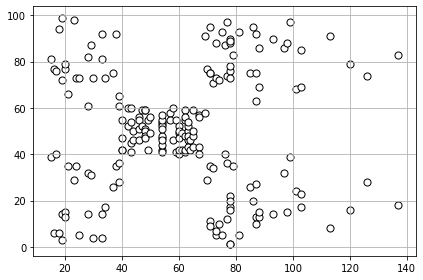

In [51]:
# plot data
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [52]:
# generate linkage matrix
linked = linkage(X_std, 'ward')

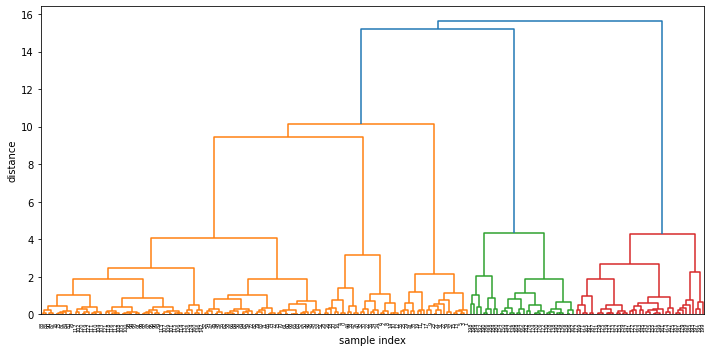

In [53]:
# plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.tight_layout()
plt.show()

Evaluating ML Model on balanced and unbalanced datasets

In [6]:
#Importing necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [7]:
# Generating balanced dataset
X_bal, y_bal = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.5, 0.5], random_state=42)
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

In [8]:
# Generating unbalanced dataset
X_unbal, y_unbal = make_classification(n_samples=1000, n_features=10, n_classes=2, weights=[0.9, 0.1], random_state=42)
X_unbal_train, X_unbal_test, y_unbal_train, y_unbal_test = train_test_split(X_unbal, y_unbal, test_size=0.2, random_state=42)

In [9]:
# Training and evaluating the model on the balanced dataset
rf_bal = RandomForestClassifier(random_state=42)
rf_bal.fit(X_bal_train, y_bal_train)
y_bal_pred = rf_bal.predict(X_bal_test)
print("Balanced Dataset:")
print("Accuracy:", accuracy_score(y_bal_test, y_bal_pred))
print("F1-Score:", f1_score(y_bal_test, y_bal_pred))
print("Confusion Matrix:\n", confusion_matrix(y_bal_test, y_bal_pred))

Balanced Dataset:
Accuracy: 0.88
F1-Score: 0.888888888888889
Confusion Matrix:
 [[80  9]
 [15 96]]


In [10]:
# Training and evaluating the model on the unbalanced dataset
rf_unbal = RandomForestClassifier(random_state=42)
rf_unbal.fit(X_unbal_train, y_unbal_train)
y_unbal_pred = rf_unbal.predict(X_unbal_test)
print("Unbalanced Dataset:")
print("Accuracy:", accuracy_score(y_unbal_test, y_unbal_pred))
print("F1-Score:", f1_score(y_unbal_test, y_unbal_pred))
print("Confusion Matrix:\n", confusion_matrix(y_unbal_test, y_unbal_pred))

Unbalanced Dataset:
Accuracy: 0.94
F1-Score: 0.7142857142857143
Confusion Matrix:
 [[173   2]
 [ 10  15]]


K Means Clustering

In [11]:
#Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [12]:
#Loading the iris dataset
iris = load_iris()
X = iris.data

In [13]:
#Running K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

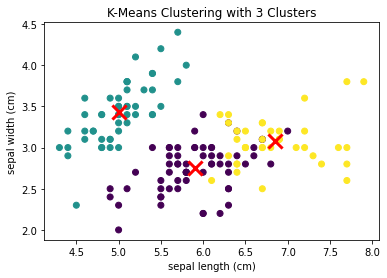

In [14]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering with 3 Clusters")
plt.show()

K Modes

In [1]:
#importinng necessary libraries
import numpy as np
from scipy import stats

In [2]:
#K-modes clustering function
def kmodes(data, k, num_iters=100):
    # randomly initializing the centroids
    l=len(data)
    centroids = data[np.random.choice(l, k, replace=False)]

    # iterate for 100 iterations
    for i in range(num_iters):
        # assigning each data point to the closest centroid
        clusters = []
        for pt in data:
            dist = [np.sum(pt != c) for c in centroids]
            cluster = np.argmin(dist)
            clusters.append(cluster)

        # updating the centroids to the mode of corresponding cluster
        for j in range(k):
            indices = np.where(np.array(clusters) == j)[0]
            if len(indices) > 0:
                cluster_data = data[indices]
                modes = stats.mode(cluster_data, axis=0)[0][0]
                centroids[j] = modes

    return clusters, centroids

In [3]:
#random data
data = np.array([
        ['red', 'small', 'square'],
        ['blue', 'small', 'circle'],
        ['red', 'medium', 'circle'],
        ['red', 'large', 'circle'],
        ['blue', 'medium', 'square'],
        ['green', 'large', 'circle'],
        ['green', 'medium', 'triangle'],
        ['red', 'medium', 'circle'],
        ['green', 'large', 'triangle'],
        ['red', 'small', 'triangle'],
        ['blue', 'small', 'square']
    ])

In [4]:
# applying K-modes clustering
clusters,centroids=kmodes(data,k=3)

In [11]:
print("Cluster assignments:")
for i in range(len(data)):
    print(data[i],clusters[i], sep="       ")
print("\nCentroids:\n", centroids)

Cluster assignments:
['red' 'small' 'square']       0
['blue' 'small' 'circle']       0
['red' 'medium' 'circle']       1
['red' 'large' 'circle']       1
['blue' 'medium' 'square']       0
['green' 'large' 'circle']       2
['green' 'medium' 'triangle']       2
['red' 'medium' 'circle']       1
['green' 'large' 'triangle']       2
['red' 'small' 'triangle']       0
['blue' 'small' 'square']       0

Centroids:
 [['blue' 'small' 'square']
 ['red' 'medium' 'circle']
 ['green' 'large' 'triangle']]


PCA

In [26]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [27]:
# Load iris dataset
iris=load_iris()


In [28]:
# Create a pandas dataframe from the dataset
df=pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [29]:
# Display the first few rows of the dataset
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [30]:
# Display summary statistics of the dataset
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
# Standardize the data
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x = df.loc[:, features].values
y = df.loc[:,['target']].values
x = StandardScaler().fit_transform(x)

In [33]:
# Compute the covariance matrix
cov_matrix = np.cov(x.T)

In [34]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [35]:
# Sort the eigenvalues in descending order and select the top k eigenvectors
k = 2
idx = eigenvalues.argsort()[::-1][:k]
topk_eigenvectors = eigenvectors[:,idx]

In [36]:
# Project the standardized data onto the top k eigenvectors to obtain the reduced data
reduced_data = x.dot(topk_eigenvectors)

In [37]:
# Display the reduced data
print(reduced_data)

[[-2.26470281 -0.4800266 ]
 [-2.08096115  0.67413356]
 [-2.36422905  0.34190802]
 [-2.29938422  0.59739451]
 [-2.38984217 -0.64683538]
 [-2.07563095 -1.48917752]
 [-2.44402884 -0.0476442 ]
 [-2.23284716 -0.22314807]
 [-2.33464048  1.11532768]
 [-2.18432817  0.46901356]
 [-2.1663101  -1.04369065]
 [-2.32613087 -0.13307834]
 [-2.2184509   0.72867617]
 [-2.6331007   0.96150673]
 [-2.1987406  -1.86005711]
 [-2.26221453 -2.68628449]
 [-2.2075877  -1.48360936]
 [-2.19034951 -0.48883832]
 [-1.898572   -1.40501879]
 [-2.34336905 -1.12784938]
 [-1.914323   -0.40885571]
 [-2.20701284 -0.92412143]
 [-2.7743447  -0.45834367]
 [-1.81866953 -0.08555853]
 [-2.22716331 -0.13725446]
 [-1.95184633  0.62561859]
 [-2.05115137 -0.24216355]
 [-2.16857717 -0.52714953]
 [-2.13956345 -0.31321781]
 [-2.26526149  0.3377319 ]
 [-2.14012214  0.50454069]
 [-1.83159477 -0.42369507]
 [-2.61494794 -1.79357586]
 [-2.44617739 -2.15072788]
 [-2.10997488  0.46020184]
 [-2.2078089   0.2061074 ]
 [-2.04514621 -0.66155811]
 

Question-6

In [19]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('diabetes.csv')
print(df.head())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [20]:
# Split the dataset into training and testing sets
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy of KNN classifier:', accuracy_knn)
print('Confusion Matrix of KNN classifier:\n', confusion_matrix(y_test, y_pred_knn))
print('Classification Report of KNN classifier:\n', classification_report(y_test, y_pred_knn))

Accuracy of KNN classifier: 0.6623376623376623
Confusion Matrix of KNN classifier:
 [[70 29]
 [23 32]]
Classification Report of KNN classifier:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



Decision Tree

In [23]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy of Decision Tree classifier:', accuracy_dt)
print('Confusion Matrix of Decision Tree classifier:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report of Decision Tree classifier:\n', classification_report(y_test, y_pred_dt))

Accuracy of Decision Tree classifier: 0.7467532467532467
Confusion Matrix of Decision Tree classifier:
 [[75 24]
 [15 40]]
Classification Report of Decision Tree classifier:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



SVM

In [24]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy of SVM classifier:', accuracy_svm)
print('Confusion Matrix of SVM classifier:\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report of SVM classifier:\n', classification_report(y_test, y_pred_svm))

Accuracy of SVM classifier: 0.7532467532467533
Confusion Matrix of SVM classifier:
 [[80 19]
 [19 36]]
Classification Report of SVM classifier:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [25]:
print('Accuracy of KNN classifier:', accuracy_knn)
print('Accuracy of Decision Tree classifier:', accuracy_dt)
print('Accuracy of SVM classifier:', accuracy_svm)

Accuracy of KNN classifier: 0.6623376623376623
Accuracy of Decision Tree classifier: 0.7467532467532467
Accuracy of SVM classifier: 0.7532467532467533


Gaussian Mixture Model using EM

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.stats import multivariate_normal

In [27]:
# Load the iris dataset
iris = load_iris()

In [28]:
# Convert the dataset to a pandas dataframe
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['target'] = df['target'].astype(int)

In [29]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [30]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [31]:
# Extract the features
X = df.iloc[:, :-1].values

In [32]:
# Define the number of clusters
K = 3

In [33]:
# Define the initial means, covariances, and mixing coefficients
mu=np.random.rand(K, X.shape[1])
sigma=np.zeros((K, X.shape[1], X.shape[1]))
for k in range(K):
    sigma[k]=np.identity(X.shape[1])
pi=np.ones(K) / K

In [34]:
# Define the maximum number of iterations
max_iter=100
# Define the convergence threshold
eps=1e-6

In [35]:
# Implement the Expectation-Maximization algorithm for Gaussian Mixture Model
log_likelihoods = []
for i in range(max_iter):
    # E-step
    r = np.zeros((X.shape[0], K))
    for k in range(K):
        r[:, k] = pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k])
    r = r / np.sum(r, axis=1, keepdims=True)

    # M-step
    n_k = np.sum(r, axis=0)
    pi = n_k / X.shape[0]
    for k in range(K):
        mu[k] = np.sum(r[:, k].reshape(-1, 1) * X, axis=0) / n_k[k]
        sigma[k] = ((r[:, k].reshape(-1, 1) * (X - mu[k])).T @ (X - mu[k])) / n_k[k]

    # Compute the log-likelihood
    log_likelihood = np.sum(np.log(np.sum(pi[k] * multivariate_normal.pdf(X, mean=mu[k], cov=sigma[k]))))
    log_likelihoods.append(log_likelihood)

    # Check for convergence
    if i > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < eps:
        break

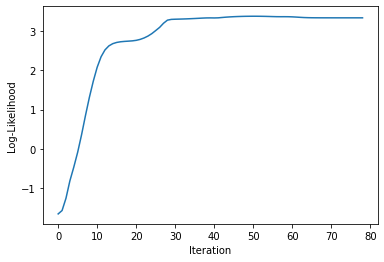

In [36]:
# Plot the log-likelihoods over iterations
plt.plot(log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.show()